In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
%matplotlib inline

In [3]:
# We need literal_eval function in order to sucessfully read column 'sentences' as list and not str (default)
df = pd.read_csv('orgs_w_sentences.csv',converters={"sentences": literal_eval})

In [4]:
# Joining all sentences for each company within one document together
df['sentences'] = df.sentences.apply(lambda x: " ".join(x))

In [5]:
# Uncomment when need a sample
#df = df.sample(1000)

In [6]:
# Checking for null values
df.isnull().sum()

uuid                 0
organization         0
sentiment_score      0
sentiment_label      0
org_relevance        0
org_count            0
confidence           1
orgs_in_doc          0
label              228
org_id               0
sentences            0
dtype: int64

In [7]:
# Removing rows with NULL label's
df = df[~df['label'].isnull()]

In [8]:
# Looking at the sentiment distribution
df['sentiment_label'].value_counts()

neutral     42417
negative    38980
positive    32173
Name: sentiment_label, dtype: int64

Wall time: 25.9 ms


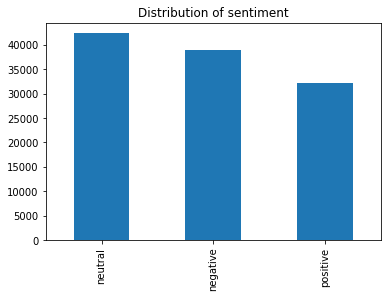

In [9]:
%%time
df.sentiment_label.value_counts().plot(kind='bar',title='Distribution of sentiment')

### Splitting data frame into test and train data sets

In [10]:
# X feature data
X = df[['sentences']]
# y is the label
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [11]:
X_train.shape

(90856, 1)

In [12]:
y_train.shape

(90856,)

In [13]:
# Saving memory
del df

### Making sure that labels have roughly the same distribution across train and test data sets

It looks like random_state=4 gives roughly the same distribution for train and test data sets. This should work well for us

Wall time: 21 ms


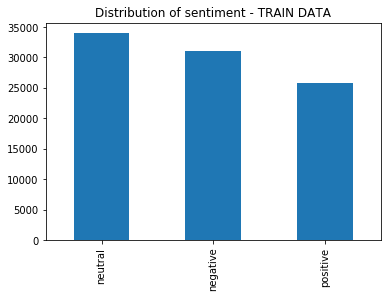

In [14]:
%%time
y_train.value_counts().plot(kind='bar',title='Distribution of sentiment - TRAIN DATA')

Wall time: 18 ms


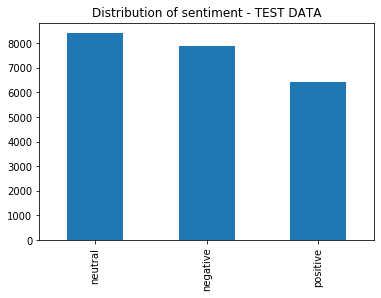

In [15]:
%%time
y_test.value_counts().plot(kind='bar',title='Distribution of sentiment - TEST DATA')

### Logistic Regression

In [16]:
count_vect = CountVectorizer(strip_accents='ascii', ngram_range=(1,2))

In [17]:
X_train = count_vect.fit_transform(X_train['sentences'])
X_train

<90856x1096172 sparse matrix of type '<class 'numpy.int64'>'
	with 6971332 stored elements in Compressed Sparse Row format>

In [18]:
#Uncomment when need a different model
model = LogisticRegression(solver='lbfgs', max_iter=1500)
#model = svm.SVC()
#model=MLPClassifier()

In [19]:
X_test = count_vect.transform(X_test['sentences'])
X_test

<22714x1096172 sparse matrix of type '<class 'numpy.int64'>'
	with 1641530 stored elements in Compressed Sparse Row format>

In [20]:
%%time
model.fit(X_train, y_train)

C:\Users\dukho\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 6min 22s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
%%time
predictions = model.predict(X_test)

Wall time: 77.8 ms


In [22]:
df = pd.DataFrame(confusion_matrix(y_test,predictions), index=['negative','neutral','positive'], columns=['negative','neutral','positive'])
df

,negative,neutral,positive
negative,6676,646,554
neutral,451,7368,592
positive,687,964,4776


In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      7876
     neutral       0.82      0.88      0.85      8411
    positive       0.81      0.74      0.77      6427

    accuracy                           0.83     22714
   macro avg       0.83      0.82      0.82     22714
weighted avg       0.83      0.83      0.83     22714



In [24]:
print(accuracy_score(y_test, predictions))

0.8285638813066831
